<a href="https://colab.research.google.com/github/huang-jen/jen-tester/blob/main/copy_iunik_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import statistics
import json


In [ ]:
import json

with open('iunik.json', 'r') as file:
    iunik = json.load(file)

# Flattening JSON & Converting to Dataframe

In [ ]:
# Creating a DataFrame for user information
user_data = []
for user in iunik:
    username_info = user["ig_username"]
    user_data.append({
        "ig_username": username_info[0],
        "followers": username_info[1],
        "following": username_info[2],
        "total_posts": username_info[3]
    })

creators_df = pd.DataFrame(user_data)

# Creating a DataFrame for posts
posts_data = []
for user in iunik:
    username = user["ig_username"][0]
    for post_url, post_details in user["posts"].items():
        post_dict = {"ig_username": username, "post_url": post_url}
        for detail in post_details:
            post_dict[detail[0].strip(': ')] = detail[1]
        posts_data.append(post_dict)

posts_df = pd.DataFrame(posts_data)

creators_df.head(), posts_df.head()

(                               ig_username        followers        following  \
 0      https://www.instagram.com/euniunni/    89K Followers  5,283 Following   
 1       https://www.instagram.com/mee.l.a/  4,000 Followers  1,067 Following   
 2  https://www.instagram.com/claudinejay_/    27K Followers    845 Following   
 3    https://www.instagram.com/ralucafiru/  3,001 Followers    706 Following   
 4      https://www.instagram.com/ivyy.lii/   223K Followers    265 Following   
 
    total_posts  
 0  2,362 Posts  
 1     44 Posts  
 2    384 Posts  
 3    270 Posts  
 4     28 Posts  ,
                            ig_username  \
 0  https://www.instagram.com/euniunni/   
 1  https://www.instagram.com/euniunni/   
 2  https://www.instagram.com/euniunni/   
 3  https://www.instagram.com/euniunni/   
 4  https://www.instagram.com/euniunni/   
 
                                    post_url        likes     comments  \
 0  https://www.instagram.com/p/Cz2TqWSyI-Y/    890 likes  23 comment

In [ ]:
creators_df

,ig_username,followers,following,total_posts
0,https://www.instagram.com/euniunni/,89K Followers,"5,283 Following","2,362 Posts"
1,https://www.instagram.com/mee.l.a/,"4,000 Followers","1,067 Following",44 Posts
2,https://www.instagram.com/claudinejay_/,27K Followers,845 Following,384 Posts
3,https://www.instagram.com/ralucafiru/,"3,001 Followers",706 Following,270 Posts
4,https://www.instagram.com/ivyy.lii/,223K Followers,265 Following,28 Posts
5,https://www.instagram.com/rose.friederike/,194K Followers,"1,983 Following","1,075 Posts"
6,https://www.instagram.com/ClickforTaz/,158K Followers,445 Following,"1,038 Posts"
7,https://www.instagram.com/tinatanakaharris/,41K Followers,643 Following,228 Posts
8,https://www.instagram.com/lera_valesta/,279K Followers,239 Following,248 Posts
9,https://www.instagram.com/helinndoski/,327K Followers,676 Following,615 Posts


In [ ]:
def convert_social_media_columns(df):

    def convert_to_int(cell):
        if pd.isna(cell):
            return None  # Handle NaN values
        if isinstance(cell, int):
            return cell  # Already an integer, no conversion needed
        # Remove all non-numeric, non-decimal, and non-k/m characters
        cell_cleaned = re.sub(r'[^\d.kmKM]', '', cell)
        if 'k' in cell_cleaned.lower():
            return int(float(cell_cleaned.lower().replace('k', '')) * 1_000)
        elif 'm' in cell_cleaned.lower():
            return int(float(cell_cleaned.lower().replace('m', '')) * 1_000_000)
        else:
            return int(cell_cleaned)

    df['followers'] = df['followers'].apply(convert_to_int)
    df['following'] = df['following'].apply(convert_to_int)
    df['total_posts'] = df['total_posts'].apply(convert_to_int)

    return df

creators_df = convert_social_media_columns(creators_df)


In [ ]:
# Function to convert likes and comments to integers or NaN
def convert_to_int(value):
    try:
        # Check if value is a string and if it contains 'likes' or 'comments'
        if isinstance(value, str) and ('likes' in value or 'comments' in value):
            # If 'likes are hidden' or 'comments are hidden', return NaN
            if 'hidden' in value:
                return np.nan
            # Otherwise, remove commas and convert to integer
            return int(value.split()[0].replace(',', ''))
    except ValueError:  # includes simplejson.decoder.JSONDecodeError
        return np.nan

# Apply the function to the 'likes' and 'comments' columns
posts_df['likes'] = posts_df['likes'].apply(convert_to_int)
posts_df['comments'] = posts_df['comments'].apply(convert_to_int)

In [ ]:
posts_df

,ig_username,post_url,likes,comments,caption,hashtags
0,https://www.instagram.com/euniunni/,https://www.instagram.com/p/Cz2TqWSyI-Y/,890.0,23.0,"Doona Lee is here~! 😜\nGuys, I had sooo much f...","[#linkinbio, #AD, #colorgram, #bringgreen, #ko..."
1,https://www.instagram.com/euniunni/,https://www.instagram.com/p/Czm3pk7S_D6/,3665.0,28.0,This was soooooo interesting! \nI was so shock...,"[#euniunni, #personalcoloranalysis, #seoul, #t..."
2,https://www.instagram.com/euniunni/,https://www.instagram.com/p/Cz4-boVSeOh/,771.0,9.0,This is your chance to finally try one of the ...,"[#AD, #innerb, #collagen, #edibleskincare, #gl..."
3,https://www.instagram.com/euniunni/,https://www.instagram.com/p/CzkXp0cy_6T/,668.0,19.0,I realllllllly want to recommend this place to...,"[#euniunni, #seoul, #foodie, #koreanfood]"
4,https://www.instagram.com/euniunni/,https://www.instagram.com/p/CzcpgpUy7Ea/,971.0,31.0,I could go on and on about this product...🤓 \n...,"[#euniunni, #skincare, #kbeauty, #vtcosmetics]"
...,...,...,...,...,...,...
247,https://www.instagram.com/luadoll_/,https://www.instagram.com/p/Cx5UxuPJ3x1/,6121.0,30.0,하트배경화면 만들기🩵,"[#love, #허영지]"
248,https://www.instagram.com/luadoll_/,https://www.instagram.com/p/CxcX30YJ6ZU/,NaN,NaN,냠냠😋 오디게\n,"[#purplekiss, #7heaven]"
249,https://www.instagram.com/luadoll_/,https://www.instagram.com/p/CxTDebSpC46/,9747.0,30.0,비 안왔당😃✌🏻,[]
250,https://www.instagram.com/luadoll_/,https://www.instagram.com/p/CyyLteGpOPE/,9565.0,23.0,유행 막차타기..🍂,[]


In [ ]:
creators_df


,ig_username,followers,following,total_posts
0,https://www.instagram.com/euniunni/,89000,5283,2362
1,https://www.instagram.com/mee.l.a/,4000,1067,44
2,https://www.instagram.com/claudinejay_/,27000,845,384
3,https://www.instagram.com/ralucafiru/,3001,706,270
4,https://www.instagram.com/ivyy.lii/,223000,265,28
5,https://www.instagram.com/rose.friederike/,194000,1983,1075
6,https://www.instagram.com/ClickforTaz/,158000,445,1038
7,https://www.instagram.com/tinatanakaharris/,41000,643,228
8,https://www.instagram.com/lera_valesta/,279000,239,248
9,https://www.instagram.com/helinndoski/,327000,676,615


# Creators

In [ ]:
creators_df

## Looking at follower numbers

In [ ]:
print("The average amount of followers for IUNIK brand collaborators are ", creators_df['followers'].mean())
print("The max amount of followers that an IUNIK brand collaborator has is ", creators_df['followers'].max())
print("The minimum amount of followers that an IUNIK brand collaborator has is ", creators_df['followers'].min())


### From the data we can see that IUNIK collaborates with both large reaching cotent creators as well as small creators since we see that the largest creator has almost 1.4 million followers while on the other end there is a creator that has less than two thousand followers. Also looking at the average amount of followers that the creators have, we can see it is around 200k which would be considered to be around Mid-Tier Influencers, as referenced from(https://www.benlabs.com/resources/types-of-influencers/).


## Number of total_posts

In [ ]:
print("The average amount of posts for IUNIK brand collaborators are ", creators_df['total_posts'].mean())
print("The max amount of posts that an IUNIK brand collaborator has is ", creators_df['total_posts'].max())
print("The minimum amount of posts that an IUNIK brand collaborator has is ", creators_df['total_posts'].min())

### On average an IUNIK brand creator has around 500 posts and on the high side around 2k posts, on the low side with 28 posts.

In [ ]:
print("The average amount of people follwing for IUNIK brand collaborators are ", creators_df['following'].mean())
print("The max amount of people follwing that an IUNIK brand collaborator has is ", creators_df['following'].max())
print("The minimum amount of people follwing that an IUNIK brand collaborator has is ", creators_df['following'].min())


# Posts

In [ ]:
posts_df

In [ ]:
post_stats = posts_df.groupby('ig_username').agg({'likes':['mean','max','min'], 'comments': ['mean','max', 'min']})

In [ ]:
post_stats

In [ ]:
post_stats.columns = ['_'.join(col).strip() for col in post_stats.columns.values]

# Reset index to flatten the DataFrame completely
post_stats.reset_index(inplace=True)

In [ ]:
post_stats

In [ ]:
!pip install textblob
!pip install nltk



In [ ]:
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import numpy as np

# You might need to download the 'vader_lexicon' if you haven't already
nltk.download('vader_lexicon')


In [ ]:
def calculate_sentiment(text):
    # Use TextBlob or VADER to calculate sentiment
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']  # Use compound score for overall sentiment

def most_common_hashtags(hashtags_list):
    # Count occurrences directly on the list of hashtags
    count = Counter(hashtags_list)
    if count:
        return count.most_common(1)[0][0]  # Return the most common hashtag
    return np.nan  # Return NaN if there are no hashtags

In [ ]:
posts_df['sentiment'] = posts_df['caption'].apply(calculate_sentiment)
posts_df['most_used_hashtag'] = posts_df['hashtags'].apply(most_common_hashtags)

In [ ]:
#Caption Length
posts_df['caption_length'] = posts_df['caption'].apply(lambda x: len(x.split()))
avg_caption_length = posts_df.groupby('ig_username')['caption_length'].mean().reset_index(name='avg_caption_length')


# Group by 'ig_username' to calculate average sentiment
creator_sentiment = posts_df.groupby('ig_username')['sentiment'].mean().reset_index()

# Group by 'ig_username' to find the most used hashtag
creator_hashtags = posts_df.groupby('ig_username')['most_used_hashtag'].agg(lambda x: most_common_hashtags(x)).reset_index()

# Combine the results into a single DataFrame
creator_analysis = post_stats.merge(creator_sentiment, on='ig_username').merge(creator_hashtags, on='ig_username')



In [ ]:
merged_creator_posts_analysis = creator_analysis.merge(creators_df, on = 'ig_username')
merged_creator_posts_analysis = merged_creator_posts_analysis.merge(avg_caption_length, on = 'ig_username')

In [ ]:
merged_creator_posts_analysis = merged_creator_posts_analysis.merge(avg_caption_length, on = 'ig_username')

In [ ]:
merged_creator_posts_analysis

# Packaged EDA


In [ ]:
#Install these if haven't downloaded yet
# !pip install textblob
# !pip install nltk
# # You might need to download the 'vader_lexicon' if you haven't already
# nltk.download('vader_lexicon')
#nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import numpy as np
import pandas as pd
import numpy as np
import re
import statistics
import json
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud

def EDA_pipeline(brand):
    json_file = brand +".json"
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Creating a DataFrame for user information
    user_data = []
    for user in data:
        username_info = user["ig_username"]
        user_data.append({
            "ig_username": username_info[0],
            "followers": username_info[1],
            "following": username_info[2],
            "total_posts": username_info[3]
        })

    creators_df = pd.DataFrame(user_data)

    # Creating a DataFrame for posts
    posts_data = []
    for user in data:
        username = user["ig_username"][0]
        for post_url, post_details in user["posts"].items():
            post_dict = {"ig_username": username, "post_url": post_url}
            for detail in post_details:
                post_dict[detail[0].strip(': ')] = detail[1]
            posts_data.append(post_dict)

    posts_df = pd.DataFrame(posts_data)

    def convert_social_media_columns(df):

        def convert_to_int(cell):
            if pd.isna(cell):
                return None  # Handle NaN values
            if isinstance(cell, int):
                return cell  # Already an integer, no conversion needed
            # Remove all non-numeric, non-decimal, and non-k/m characters
            cell_cleaned = re.sub(r'[^\d.kmKM]', '', cell)
            if 'k' in cell_cleaned.lower():
                return int(float(cell_cleaned.lower().replace('k', '')) * 1_000)
            elif 'm' in cell_cleaned.lower():
                return int(float(cell_cleaned.lower().replace('m', '')) * 1_000_000)
            else:
                return int(cell_cleaned)

        df['followers'] = df['followers'].apply(convert_to_int)
        df['following'] = df['following'].apply(convert_to_int)
        df['total_posts'] = df['total_posts'].apply(convert_to_int)

        return df

    creators_df = convert_social_media_columns(creators_df)

        # Function to convert likes and comments to integers or NaN
    def convert_to_int(value):
        try:
            # Check if value is a string and if it contains 'likes' or 'comments'
            if isinstance(value, str) and ('likes' in value or 'comments' in value):
                # If 'likes are hidden' or 'comments are hidden', return NaN
                if 'hidden' in value:
                    return np.nan
                # Otherwise, remove commas and convert to integer
                return int(value.split()[0].replace(',', ''))
        except ValueError:  # includes simplejson.decoder.JSONDecodeError
            return np.nan

    # Apply the function to the 'likes' and 'comments' columns
    posts_df['likes'] = posts_df['likes'].apply(convert_to_int)
    posts_df['comments'] = posts_df['comments'].apply(convert_to_int)

#     creators_df.head(), posts_df.head()

    # FOLLOWERS
    print("The average amount of followers for " + brand + "brand collaborators are ", creators_df['followers'].mean())
    print("The max amount of followers that an " + brand +  " brand collaborator has is ", creators_df['followers'].max())

    print("The minimum amount of followers that an " + brand + "brand collaborator has is" , creators_df['followers'].min())

    #POSTS
    print("The average amount of posts for " +brand + "brand collaborators are ", creators_df['total_posts'].mean())
    print("The max amount of posts that an "+ brand + "brand collaborator has is ", creators_df['total_posts'].max())
    print("The minimum amount of posts that an "+ brand + "brand collaborator has is ", creators_df['total_posts'].min())

    #FOLLOWING
    print("The average amount of people follwing for " + brand + "brand collaborators are ", creators_df['following'].mean())
    print("The max amount of people follwing that an " + brand + "brand collaborator has is ", creators_df['following'].max())
    print("The minimum amount of people follwing that an "+ brand + " brand collaborator has is ", creators_df['following'].min())

    #GROUPBY
    post_stats = posts_df.groupby('ig_username').agg({'likes':['mean','max','min'], 'comments': ['mean','max', 'min']})
    post_stats.columns = ['_'.join(col).strip() for col in post_stats.columns.values]

    # Reset index to flatten the DataFrame completely
    post_stats.reset_index(inplace=True)

    #SENTIMENT ANALYSIS
    def calculate_sentiment(text):
        # Use TextBlob or VADER to calculate sentiment
        sia = SentimentIntensityAnalyzer()
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score['compound']  # Use compound score for overall sentiment

    def most_common_hashtags(hashtags_list):
        # Count occurrences directly on the list of hashtags
        count = Counter(hashtags_list)
        if count:
            return count.most_common(1)[0][0]  # Return the most common hashtag
        return np.nan  # Return NaN if there are no hashtags


    ##COMMENT ON SENTIMENT ANALYSIS: 0.1 Indicates that the sentiment is slightly positive,
    ## while a 0.9 indicates a very positive sentiment, likely to contain positive language or expressions
    ## a number close to 0 indicates neutral sentiment, a number closer to -1 indicates negative sentiment
    posts_df['sentiment'] = posts_df['caption'].apply(calculate_sentiment)
    posts_df['most_used_hashtag'] = posts_df['hashtags'].apply(most_common_hashtags)


    #Caption Length
    posts_df['caption_length'] = posts_df['caption'].apply(lambda x: len(x.split()))
    avg_caption_length = posts_df.groupby('ig_username')['caption_length'].mean().reset_index(name='avg_caption_length')


    # Group by 'ig_username' to calculate average sentiment
    creator_sentiment = posts_df.groupby('ig_username')['sentiment'].mean().reset_index()

    # Group by 'ig_username' to find the most used hashtag
    creator_hashtags = posts_df.groupby('ig_username')['most_used_hashtag'].agg(lambda x: most_common_hashtags(x)).reset_index()

    # Combine the results into a single DataFrame
    creator_analysis = post_stats.merge(creator_sentiment, on='ig_username').merge(creator_hashtags, on='ig_username')


    merged_creator_posts_analysis = creator_analysis.merge(creators_df, on = 'ig_username')
    merged_creator_posts_analysis = merged_creator_posts_analysis.merge(avg_caption_length, on = 'ig_username')
    merged_creator_posts_analysis['engagement_rate'] = ((merged_creator_posts_analysis['likes_mean'] + merged_creator_posts_analysis['comments_mean']) / merged_creator_posts_analysis['followers']) * 100
    merged_creator_posts_analysis = merged_creator_posts_analysis.sort_values(by=['followers'])




    # Aggregate words and hashtags for each creator
    word_agg = defaultdict(list)
    hashtag_agg = defaultdict(list)
    stop_words = set(stopwords.words('english'))

    for _, row in posts_df.iterrows():
        # Aggregate words (excluding stopwords)
        words = [word for word in row['caption'].lower().split() if word not in stop_words and word.isalpha()]
        word_agg[row['ig_username']].extend(words)

        # Aggregate hashtags
        hashtags = row['hashtags']  # Assuming hashtags are stored as a list
        hashtag_agg[row['ig_username']].extend(hashtags)

    # Calculate most common words and hashtags for each creator
    most_common_words = {user: Counter(words).most_common(1)[0][0] if words else np.nan for user, words in word_agg.items()}
    most_common_hashtags = {user: Counter(hashtags).most_common(1)[0][0] if hashtags else np.nan for user, hashtags in hashtag_agg.items()}

    # Adding most common words and hashtags to the DataFrame
    merged_creator_posts_analysis['most_common_word'] = merged_creator_posts_analysis['ig_username'].map(most_common_words)
    merged_creator_posts_analysis['most_common_hashtag'] = merged_creator_posts_analysis['ig_username'].map(most_common_hashtags)

    analysis_df = merged_creator_posts_analysis
    #Graph outputs
    # Set the style
    sns.set(style="whitegrid")

    # Create a bar chart for average likes per creator
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='likes_mean', y='ig_username', data=analysis_df, ci=None)
    ax.set_xlabel('Average Likes')
    ax.set_ylabel('Instagram Username')
    plt.title('Average Likes per Content Creator')
    plt.show()


    #Distribution of Caption Lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(analysis_df['avg_caption_length'], bins=20, kde=True)
    plt.xlabel('Caption Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Caption Lengths')
    plt.show()

    #correlation between likes and comments
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=analysis_df, x='likes_mean', y='comments_mean', hue='ig_username', s=100)
    plt.xlabel('Average Likes')
    plt.ylabel('Average Comments')
    plt.title('Correlation between Average Likes and Comments')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

    # Sentiment Analysis Graph
    plt.figure(figsize=(12, 8))
    sns.barplot(x='sentiment', y='ig_username', data=analysis_df)
    plt.xlabel('Average Sentiment')
    plt.ylabel('Instagram Username')
    plt.title('Average Sentiment per Content Creator')
    plt.show()


    df_sorted = analysis_df.sort_values(by='engagement_rate', ascending=False)

    # Plotting Engagement Rate
    plt.figure(figsize=(20, 6))
    plt.bar(df_sorted['ig_username'], df_sorted['engagement_rate'], color='skyblue')
    plt.xlabel('Instagram Username')
    plt.ylabel('Engagement Rate (%)')
    plt.title('Engagement Rate by Instagram Creator')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #from wordcloud import WordCloud
    final_df = analysis_df
    # Combine all hashtags and common words into single strings
    all_hashtags = ' '.join(final_df['most_common_hashtag'].dropna())
    all_words = ' '.join(final_df['most_common_word'].dropna())

    # Create a word cloud for hashtags
    wordcloud_hashtags = WordCloud().generate(all_hashtags)

    # Create a word cloud for words
    wordcloud_words = WordCloud().generate(all_words)

    # Plot the WordCloud for hashtags
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud_hashtags)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Word Cloud for Hashtags")
    plt.show()

    # Plot the WordCloud for words
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud_words)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Word Cloud for Common Words")
    plt.show()

    print(final_df.head())
    return final_df


The average amount of followers for iunikbrand collaborators are  217607.14285714287
The max amount of followers that an iunik brand collaborator has is  1400000
The minimum amount of followers that an iunikbrand collaborator has is 1779
The average amount of posts for iunikbrand collaborators are  546.5238095238095
The max amount of posts that an iunikbrand collaborator has is  2362
The minimum amount of posts that an iunikbrand collaborator has is  28
The average amount of people follwing for iunikbrand collaborators are  1555.1904761904761
The max amount of people follwing that an iunikbrand collaborator has is  6514
The minimum amount of people follwing that an iunik brand collaborator has is  136


/Users/jaeswang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:193: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



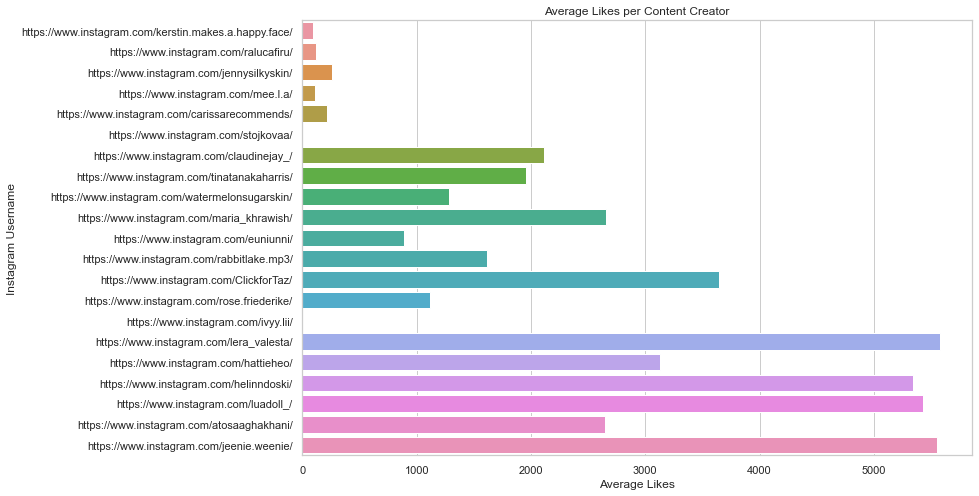

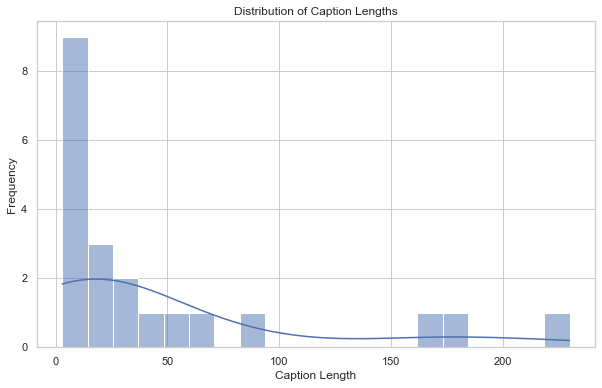

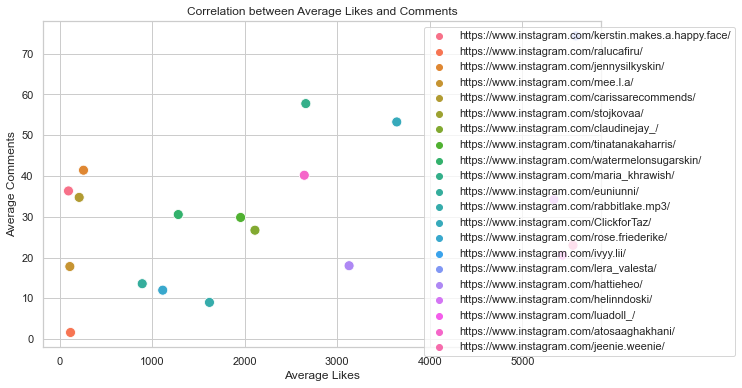

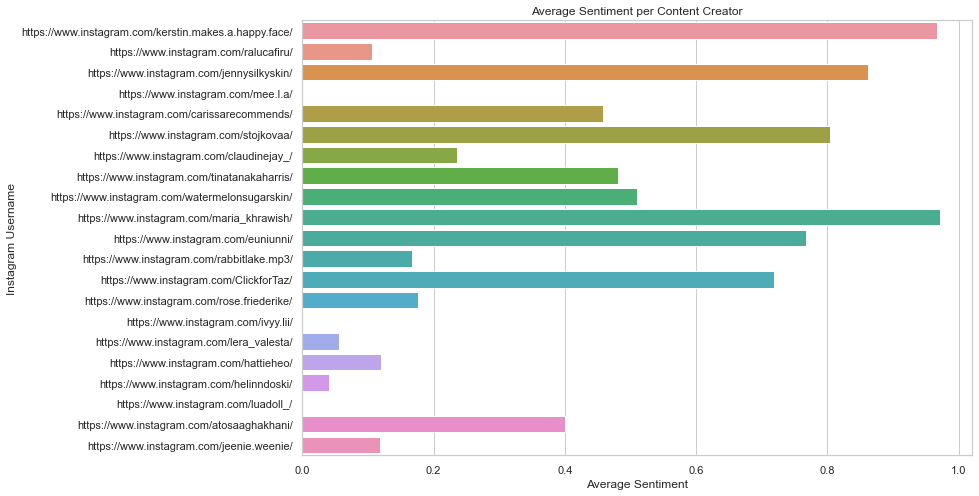

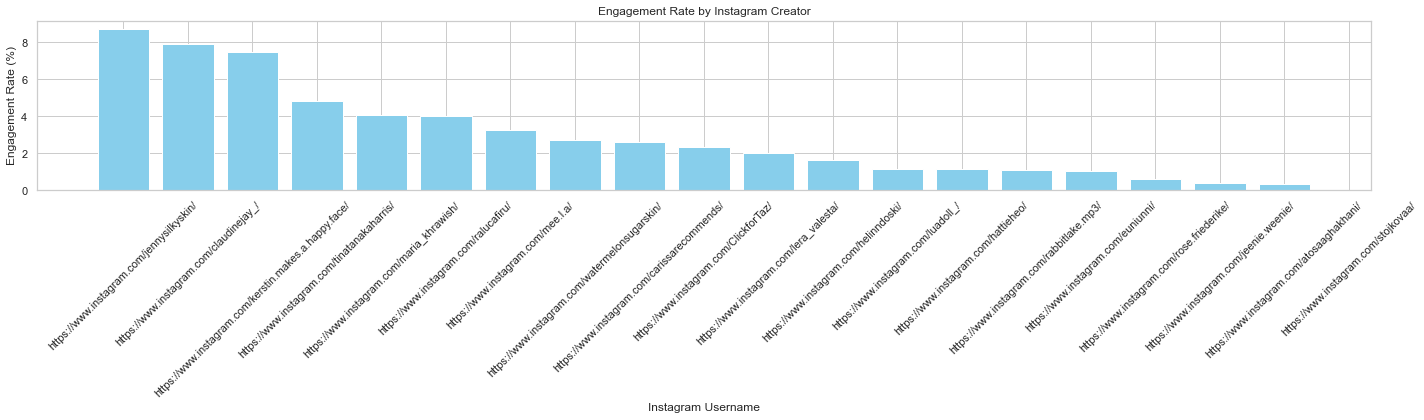

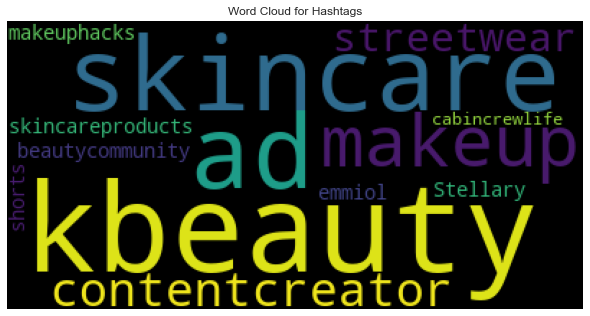

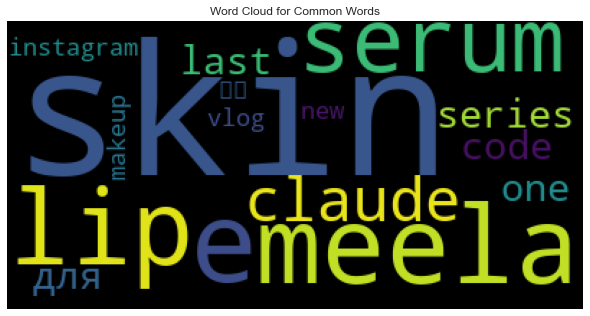

                                          ig_username  likes_mean  likes_max  \
10  https://www.instagram.com/kerstin.makes.a.happ...   96.666667      254.0   
16              https://www.instagram.com/ralucafiru/  118.625000      259.0   
9           https://www.instagram.com/jennysilkyskin/  259.000000      726.0   
14                 https://www.instagram.com/mee.l.a/  111.400000      184.0   
2        https://www.instagram.com/carissarecommends/  212.375000      491.0   

    likes_min  comments_mean  comments_max  comments_min  sentiment  \
10       43.0      36.333333          53.0          18.0   0.967667   
16       39.0       1.625000           4.0           0.0   0.107008   
9       107.0      41.416667          89.0           8.0   0.861983   
14       75.0      17.800000          27.0          13.0   0.000000   
2        41.0      34.750000          75.0          14.0   0.458908   

              most_used_hashtag  followers  following  total_posts  \
10                    

In [ ]:
analysis_df = EDA_pipeline('iunik')

In [ ]:
analysis_df

,ig_username,likes_mean,likes_max,likes_min,comments_mean,comments_max,comments_min,sentiment,most_used_hashtag,followers,following,total_posts,avg_caption_length,engagement_rate,most_common_word,most_common_hashtag
10,https://www.instagram.com/kerstin.makes.a.happ...,96.666667,254.0,43.0,36.333333,53.0,18.0,0.967667,#lipcare,1779,2282,538,229.750000,7.476110,skin,#kbeauty
16,https://www.instagram.com/ralucafiru/,118.625000,259.0,39.0,1.625000,4.0,0.0,0.107008,NaN,3001,706,270,8.916667,4.006998,e,#a
9,https://www.instagram.com/jennysilkyskin/,259.000000,726.0,107.0,41.416667,89.0,8.0,0.861983,NaN,3443,2019,272,164.333333,8.725433,skin,#contentcreator
14,https://www.instagram.com/mee.l.a/,111.400000,184.0,75.0,17.800000,27.0,13.0,0.000000,NaN,4000,1067,44,3.750000,3.230000,meela,#streetwear
2,https://www.instagram.com/carissarecommends/,212.375000,491.0,41.0,34.750000,75.0,14.0,0.458908,#officialglowgangambassador,9527,996,271,33.583333,2.593944,lip,#beautycommunity
18,https://www.instagram.com/stojkovaa/,NaN,NaN,NaN,NaN,NaN,NaN,0.803258,#skincareshelfie,27000,3865,524,91.583333,NaN,serum,#skincareproducts
3,https://www.instagram.com/claudinejay_/,2111.500000,8175.0,83.0,26.700000,82.0,0.0,0.235017,NaN,27000,845,384,18.500000,7.919259,claude,NaN
19,https://www.instagram.com/tinatanakaharris/,1956.583333,6390.0,555.0,29.833333,77.0,7.0,0.481133,#japan,41000,643,228,41.250000,4.844919,skin,#skincare
20,https://www.instagram.com/watermelonsugarskin/,1282.909091,2840.0,57.0,30.545455,53.0,11.0,0.509825,#kbeauty,48000,996,515,60.583333,2.736364,skin,#skincare
13,https://www.instagram.com/maria_khrawish/,2660.916667,3739.0,1447.0,57.750000,78.0,34.0,0.971525,#benton,67000,6514,712,178.583333,4.057711,series,#kbeauty


# Graphs

/Users/jaeswang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == '__main__':


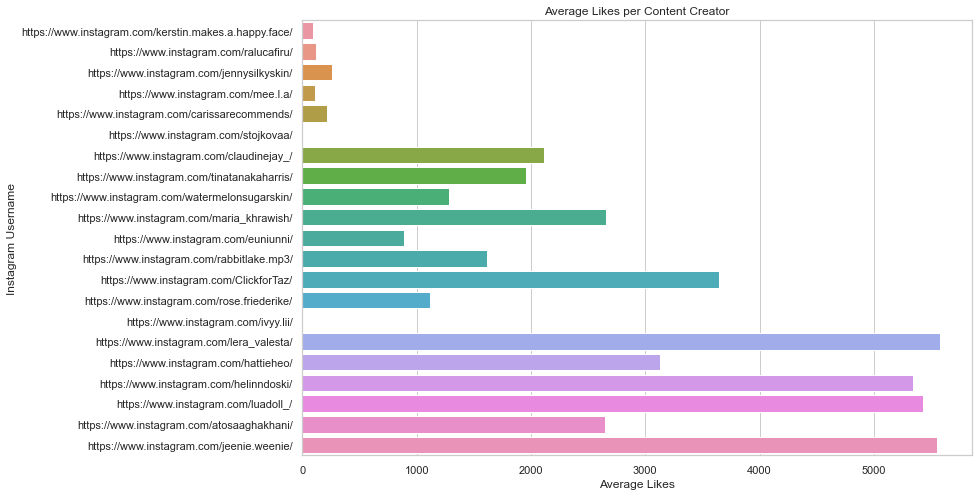

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a bar chart for average likes per creator
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='likes_mean', y='ig_username', data=analysis_df, ci=None)
ax.set_xlabel('Average Likes')
ax.set_ylabel('Instagram Username')
plt.title('Average Likes per Content Creator')
plt.show()


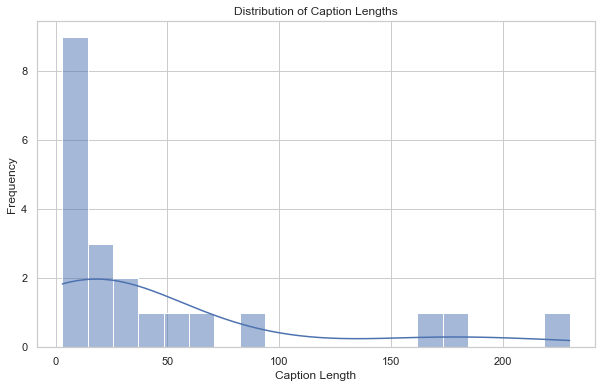

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(analysis_df['avg_caption_length'], bins=20, kde=True)
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.title('Distribution of Caption Lengths')
plt.show()


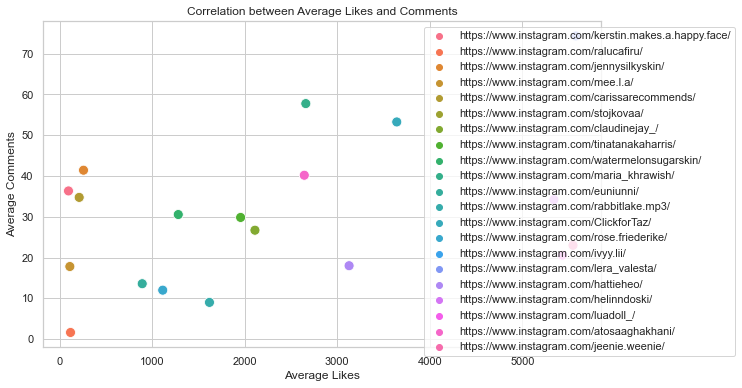

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_df, x='likes_mean', y='comments_mean', hue='ig_username', s=100)
plt.xlabel('Average Likes')
plt.ylabel('Average Comments')
plt.title('Correlation between Average Likes and Comments')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

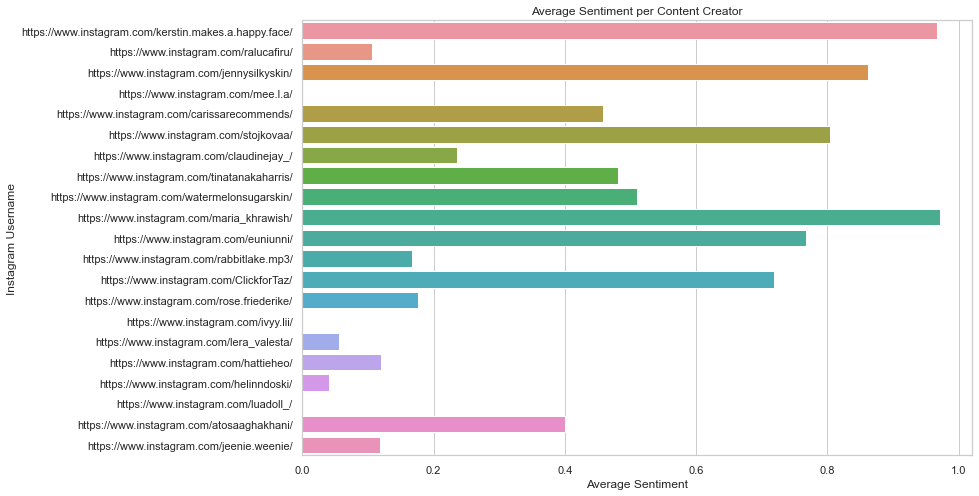

In [ ]:
# Sentiment Analysis Graph
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='ig_username', data=analysis_df)
plt.xlabel('Average Sentiment')
plt.ylabel('Instagram Username')
plt.title('Average Sentiment per Content Creator')
plt.show()

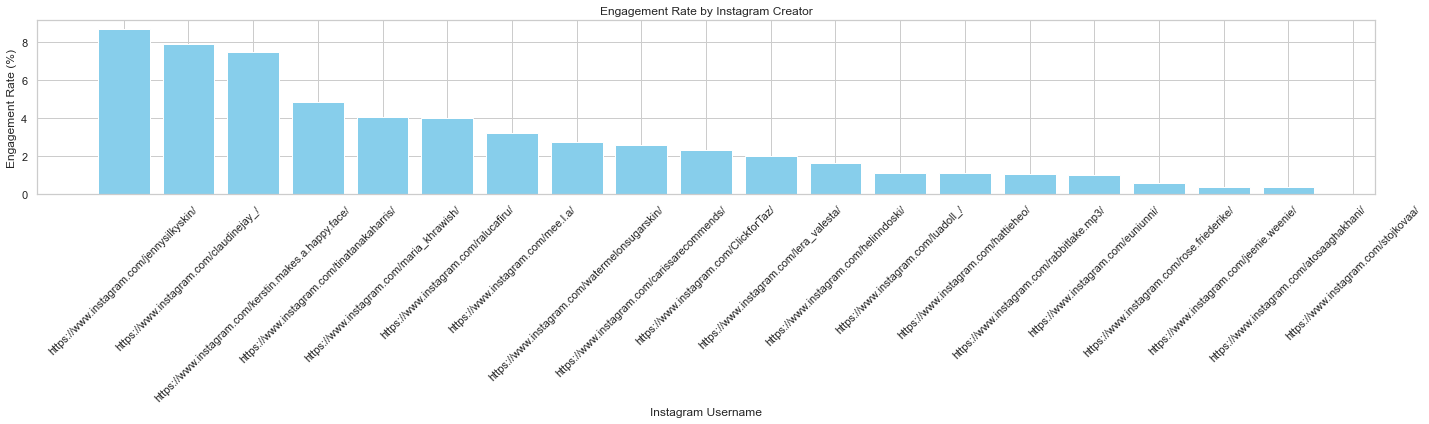

In [ ]:
df_sorted = analysis_df.sort_values(by='engagement_rate', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(df_sorted['ig_username'], df_sorted['engagement_rate'], color='skyblue')
plt.xlabel('Instagram Username')
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Instagram Creator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

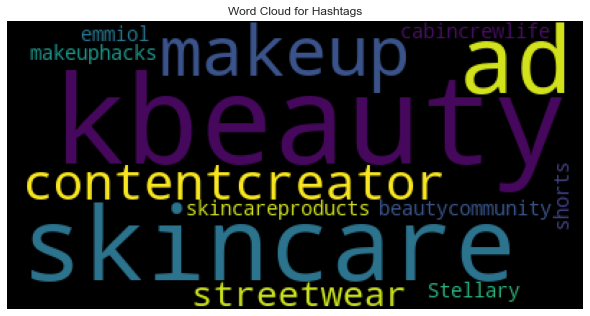

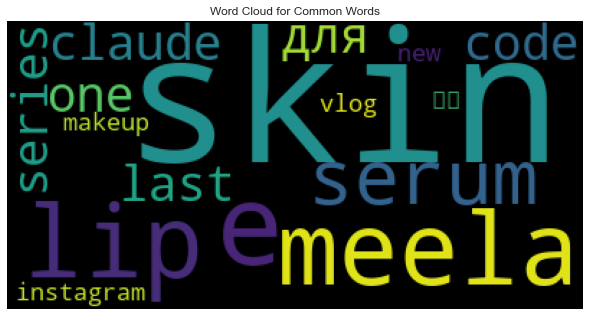

In [ ]:
from wordcloud import WordCloud

# Replace 'final_df' with the actual name of your DataFrame
final_df = analysis_df  # Use your actual DataFrame name here

# Combine all hashtags and common words into single strings
all_hashtags = ' '.join(final_df['most_common_hashtag'].dropna())
all_words = ' '.join(final_df['most_common_word'].dropna())

# Create a word cloud for hashtags
wordcloud_hashtags = WordCloud().generate(all_hashtags)

# Create a word cloud for words
wordcloud_words = WordCloud().generate(all_words)

# Plot the WordCloud for hashtags
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_hashtags)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Hashtags")
plt.show()

# Plot the WordCloud for words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_words)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Common Words")
plt.show()